In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
data_path = "/content/drive/MyDrive/dataset"

In [3]:
train_data = "/content/drive/MyDrive/dataset/train"

In [4]:
test_data = "/content/drive/MyDrive/dataset/test"

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2424 files belonging to 3 classes.
Using 1940 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data ,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 606 files belonging to 3 classes.
Using 121 files for validation.


In [7]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 1s 0us/step


In [8]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [9]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


61/61 [==============================] - 287s 4s/step - loss: 0.2675 - accuracy: 0.9149 - val_loss: 0.5511 - val_accuracy: 0.7851
Epoch 2/5
61/61 [==============================] - 223s 4s/step - loss: 0.0371 - accuracy: 0.9876 - val_loss: 0.4902 - val_accuracy: 0.8347
Epoch 3/5
61/61 [==============================] - 225s 4s/step - loss: 0.0097 - accuracy: 0.9974 - val_loss: 0.6212 - val_accuracy: 0.7934
Epoch 4/5
61/61 [==============================] - 218s 4s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.7135 - val_accuracy: 0.7851
Epoch 5/5
61/61 [==============================] - 217s 4s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6957 - val_accuracy: 0.7686


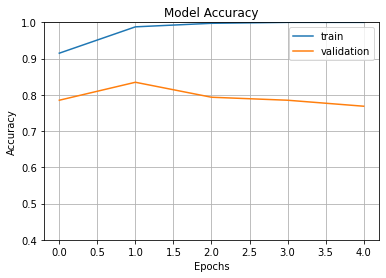

In [10]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [11]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog', 'rabbit']


In [12]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=resnet_model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [13]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.1 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 2.0 MB 53.1 MB/s 
     |████████████████████████████████| 1.1 MB 42.0 MB/s 
     |████████████████████████████████| 253 kB 61.1 MB/s 
     |████████████████████████████████| 212 kB 59.7 MB/s 
     |████████████████████████████████| 144 kB 57.2 MB/s 
     |████████████████████████████████| 271 kB 63.6 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 11.1 MB 41.9 MB/s 
     |████████████████████████████████| 80 kB 10.1 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 4.0 

In [14]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://30861.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
